In [1]:
import numpy as np
from pandas import DataFrame
from yin2008 import data; y08 = data()


In [2]:
verb=0
for fig in y08:
    print(fig.name)
    fig.pepperargs['ddG_2']=fig.pepperargs['default'].copy()
    fig.pepperargs['ddG_2']['ddG_bind'] = 2
    fig.pepperargs['reject-remote']=fig.pepperargs['condensed'].copy()
    fig.pepperargs['reject-remote']['remote_migration'] = False
    fig.eval('default', verbose=verb, cmpfig=True)
    #fig.eval('reject-remote', verbose=verb, cmpfig=True)
    #fig.eval('ddG_2', verbose=verb, cmpfig=True)   

Yin et al. (2008) Fig. 3 - Autocatalytic hairpin system (varying initiator)


In [3]:
Table1 = DataFrame()
for fig in y08:
    for df in fig.get_dataframes():
        df['name'] = fig.name
        display(df)
        Table1 = Table1.append(df)

,Input Filename,Simulation,Reporter,Metric,Metric-values,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),name
0,tmp/Yin2008-F3-00,I=20,A,diagonal-crossing-time,18000:2;-20,default,2.079210,89.004945,3.30,297.38,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
1,tmp/Yin2008-F3-00,I=6,A,diagonal-crossing-time,18000:2;-20,default,2.186745,199.011056,5.23,2256.56,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
2,tmp/Yin2008-F3-00,I=2,A,diagonal-crossing-time,18000:2;-20,default,2.286416,297.016501,7.37,4411.66,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
3,tmp/Yin2008-F3-00,I=1,A,diagonal-crossing-time,18000:2;-20,default,2.352123,353.019612,8.72,5811.08,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
4,tmp/Yin2008-F3-00,I=0.6,A,diagonal-crossing-time,18000:2;-20,default,2.363477,393.021835,9.83,6930.61,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
5,tmp/Yin2008-F3-00,I=0.4,A,diagonal-crossing-time,18000:2;-20,default,2.403168,423.023501,10.45,7546.36,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
6,tmp/Yin2008-F3-00,I=0.2,A,diagonal-crossing-time,18000:2;-20,default,2.469049,473.026279,11.17,8302.04,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
7,tmp/Yin2008-F3-00,I=0.1,A,diagonal-crossing-time,18000:2;-20,default,2.493063,523.029057,11.76,8973.76,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
8,tmp/Yin2008-F3-00,I=0.06,A,diagonal-crossing-time,18000:2;-20,default,2.528419,559.031057,12.11,9281.63,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
9,tmp/Yin2008-F3-00,I=0.02,A,diagonal-crossing-time,18000:2;-20,default,2.597645,636.035335,12.38,9561.52,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...


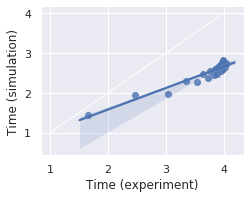

In [4]:
import matplotlib.pyplot as plt
from numpy import log10
import seaborn as sns
sns.set(style="darkgrid")

tmpfig = Table1.copy()
tmpfig['Time (experiment)'] = log10(tmpfig['Time (experiment)'])
tmpfig['Time (simulation)'] = log10(tmpfig['Time (simulation)'])
tmpfig = tmpfig.loc[tmpfig['Semantics'].isin(['default'])]
#tmpfig = tmpfig.loc[tmpfig['name'].isin(['Qian2011-SF22', 'Qian2011-SF23'])]
#display(tmpfig)

sns.lmplot(x="Time (experiment)", y="Time (simulation)", data=tmpfig)

#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1, 4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
plt.gcf().set_size_inches(3.5,2.5)

#plt.savefig('yinF3_hct.pdf', bbox_inches='tight')
#plt.savefig('yinF3_hct.svg', bbox_inches='tight')


tmp/Yin2008-F3-00-default-cmp.nxy


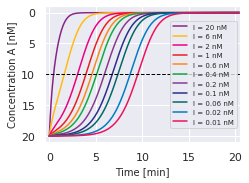

In [5]:
# Get Data from File
F3 = y08[0]
nxy = np.loadtxt(F3.cmpfig['default'], skiprows=1)

print(F3.cmpfig['default'])

time = nxy[:,0] / 60
ys = nxy[:,1:]
legend = ['20 nM', '6 nM', '2 nM', '1 nM', '0.6 nM', '0.4 nM', '0.2 nM', '0.1 nM', '0.06 nM', '0.02 nM', '0.01 nM']#, '0 nM']
legend = list(map(lambda x: '{}{}'.format('I = ', x), legend))

assert ys.shape[1] == len(legend)

# Customize plot using Yin 2008 color scheme, etc.
mycolors = ['#882486', 
            '#ffbb11', 
            '#ea0081', 
            '#eb1c22',
            '#f68a1d',
            '#0faa44', 
            '#87398e', 
            '#2b2d89',
            '#016667',
            '#027ac5',
            '#eb125b']
            #'#211e1f']

plt.figure(figsize=(3.5,2.5))
plt.gca().set_prop_cycle(color=mycolors)
#sns.set(rc={'figure.figsize':(3.5,2.5)})

#plt.gca().invert_yaxis()

# Plot the data
plt.plot(time, ys)

plt.xlim(-0.5,20.5)
plt.xticks(np.arange(0, 21, step=5))

plt.ylim(21,-1)
plt.yticks(np.arange(0, 21, step=5))

plt.legend(legend, ncol=1, loc='center right', fontsize=7);
plt.gca().set_xlabel('Time [min]', fontsize=10)
plt.gca().set_ylabel('Concentration A [nM]', fontsize=10)
plt.gca().axhline(y=10, linewidth=1, color='black', linestyle='--')

#plt.savefig('yinF3.pdf', bbox_inches='tight')
#plt.savefig('yinF3.svg', bbox_inches='tight')
